# Basic Statistics for Data Science (with Python)

**By Nur Andi Setiabudi / July 2021**

# 1. Descriptive Statistics and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import scipy.stats

import statsmodels.api as sm
import statsmodels.stats.weightstats as sms
import statsmodels.stats.proportion as prop

## Read data

In [2]:
data_url = "https://raw.githubusercontent.com/nurandi/tlkmathon-basic-stats/main/data/insurance.csv"
insurance_df = pd.read_csv(data_url)

## Basic Stat

In [3]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
insurance_df.shape

(1338, 7)

In [5]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
insurance_df['age'].mean()

39.20702541106129

In [8]:
insurance_df['age'].std()

14.049960379216172

In [9]:
insurance_df['age'].median()

39.0

In [10]:
insurance_df['age'].min()

18

In [11]:
insurance_df['age'].max()

64

In [12]:
insurance_df.groupby('sex').agg({'age':['mean', 'std', 'var', 'count']}).reset_index()

sex        age                             
                mean        std         var count
0  female  39.503021  14.054223  197.521171   662
1    male  38.917160  14.050141  197.406461   676

In [13]:
smoker_count = insurance_df.groupby('sex').agg({'smoker': 'count'}).reset_index()
smoker_count

,sex,smoker
0,female,662
1,male,676


In [14]:
smoker_count['percentage'] = 100 * smoker_count.smoker/smoker_count.smoker.sum()
smoker_count

,sex,smoker,percentage
0,female,662,49.476831
1,male,676,50.523169


In [15]:
pd.crosstab(insurance_df.sex, insurance_df.smoker)

smoker,no,yes
sex,,
female,547,115
male,517,159


In [16]:
pd.crosstab(insurance_df.sex, insurance_df.smoker, margins=True, margins_name='Total')

smoker,no,yes,Total
sex,,,
female,547,115,662
male,517,159,676
Total,1064,274,1338


## Data Viz

In [17]:
sex_charges = insurance_df.groupby('sex')[['charges']].mean().reset_index()

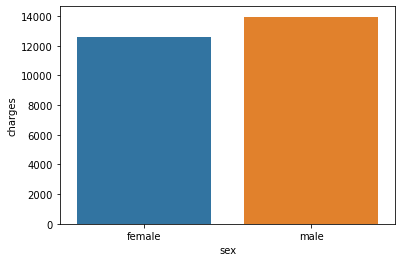

In [18]:
ax = sns.barplot(x='sex', y='charges', data=sex_charges)

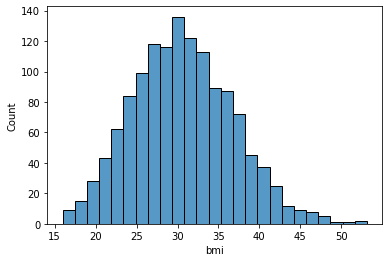

In [19]:
ax = sns.histplot(insurance_df['bmi'])

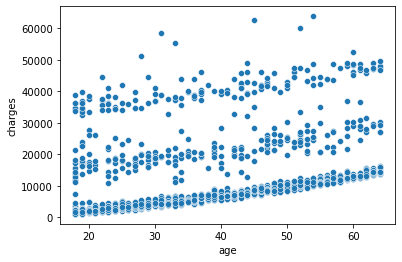

In [20]:
ax = sns.scatterplot(x='age', y='charges', data=insurance_df)

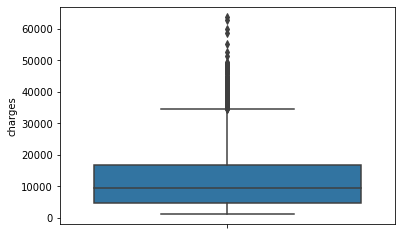

In [21]:
ax = sns.boxplot(y='charges', data=insurance_df)

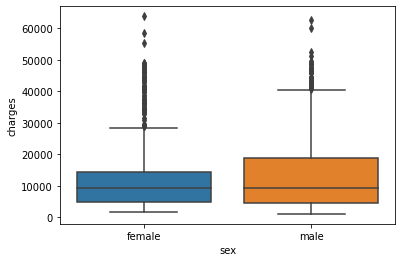

In [22]:
ax = sns.boxplot(x='sex', y="charges", data=insurance_df)

# 2. Probability Distribution

**From PPT:** The weights of adult-males are known to be normally distributed with a mean of 70 kgs and a standard deviation of 13 kgs. Find the percentage of adult-males with weights less than 80 kgs

In [24]:
weight_mean = 70
weight_stdev = 13
x0 = 80

In [25]:
prob0 = scipy.stats.norm.cdf((x0 - weight_mean)/weight_stdev)
prob0

0.7791218362875403

 Whats is probability that an adult-male has a weight between 60 and 80kg 

In [26]:
x1 = 60
prob1 = scipy.stats.norm.cdf((x1 - weight_mean)/weight_stdev)
prob = prob0 - prob1
prob

0.5582436725750806

Using the insurance data, what is the probability of having an BMI greater than 40?

In [27]:
bmi_mean = insurance_df['bmi'].mean()
bmi_stdev = insurance_df['bmi'].std()
print(bmi_mean, bmi_stdev)

x0 = 40
prob0 = scipy.stats.norm.cdf((x0 - bmi_mean)/bmi_stdev)
print(1 - prob0)

30.663396860986538 6.098186911679017
0.06287904333524363


In [28]:
bmi_std = (insurance_df['bmi'] - bmi_mean)/bmi_stdev

In [29]:
bmi_std_mean = bmi_std.mean()
bmi_std_stdev = bmi_std.std()
print(bmi_std_mean,bmi_std_stdev)

1.5532750306031851e-15 0.9999999999999998


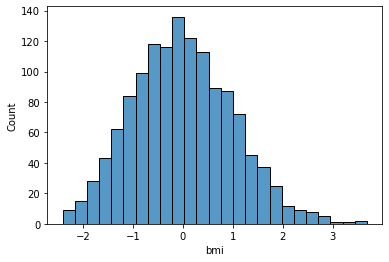

In [30]:
ax = sns.histplot(bmi_std)

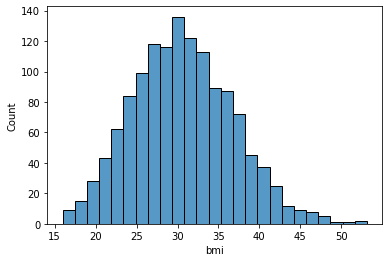

In [31]:
ax = sns.histplot(insurance_df['bmi'])

# 3. Hypothesis testing

## Confidence Interval

**From PPT:** We measure the heights of 40 randomly chosen men, and get a mean height of 175cm. We have already known that standard deviation is 20cm. Calculate the 95% confidence interval for mean height!


In [32]:
n = 40
height_mean = 175
height_stdev = 20

In [33]:
se = height_stdev/sqrt(n)

In [34]:
scipy.stats.norm.interval(0.95, loc=height_mean, scale=se)

(168.8020496769544, 181.1979503230456)

## Hypothesis testing

### One-sample T-test

A premium golf ball production line must produce all of its balls to 1.615 ounces (45.78 grams) in order to get the top rating (and therefore the top dollar). Samples are drawn hourly and checked. If the production line gets out of sync with a statistical significance of more than 1%, it must be shut down and repaired. One hour samples have been drawn.

1.616, 1.610, 1.615, 1.617, 1.618, 1.614, 1.615, 1.617, 1.610, 1.590, 1.610, 1.619, 1.620, 1.611, 1.612, 1.614, 1.615

Do you shut down the line?

Hypothesis:
-   $H_0: µ = 1.615$ ("mean of weight = 1.615 ounces")
-   $H_1: µ ≠ 1.615$

In [35]:
sample = np.array([1.616, 1.610, 1.615, 1.617, 1.618, 1.614, 1.615, 1.617, 1.610, 1.590, 1.610, 1.619, 1.620, 1.611, 1.612, 1.614, 1.615])

#### Step 1: Calculate number of sample, mean and std. dev

In [36]:
sample_mean = sample.mean()
sample_stdev = sample.std()
n = sample.size
df = n - 1


In [37]:
alpha = 0.01
h1_mean = 1.615

#### Step 2: Find/calculate critical value(s)

In [38]:
# if you have python 
cv1 = scipy.stats.t.ppf(alpha/2, df)
cv2 = scipy.stats.t.ppf(1- (alpha/2), df)
print(cv1, cv2)

-2.9207816223499976 2.9207816223499967


In [39]:
df

16

Or, simple use t-distribution table

![t-table](https://image.slidesharecdn.com/t-distributiontable-170723122602/95/t-distribution-table-1-638.jpg)

#### Step 3: Calculate t-statistic and/or p-value

In [40]:
tstat = (sample_mean - h1_mean)/(sample_stdev/(sqrt(df)))
tstat

-1.1523584392206894

In [41]:
pvalue = (1 - scipy.stats.t.cdf(abs(tstat), df)) * 2
pvalue

0.26610119536404553

#### Step 4: Draw a conclusion

**Alternatif 1:** Compare t-stat to critical value. If t-stat > |critical value| *(for two tailed test)* --> reject H0  
**Alternatif 2:** Compare p-value to alpha. If p-value < alpha --> reject H0  

For this case, we cannot reject H0 and conclude that there are not enough reasons to shut the production line down. 

### Statsmodel way

#### One-sample t-test

In [42]:
d = sms.DescrStatsW(sample)
d.ttest_mean(value=h1_mean, alternative='two-sided')

(-1.1523584392206891, 0.26610119536404553, 16.0)

#### Confidence interval

In [43]:
d.tconfint_mean()

(1.6096548269507818, 1.6165804671668649)

### One sample T-Test (2)

Using insurance data, check if on average people are overweight.

According to CDC, BMI 30 or higher is considered as overweight, so we can write our hypothesis:
    
-   $H_0: µ = 30$ ("mean of BMI = 30")
-   $H_1: µ > 30$

In [44]:
d = sms.DescrStatsW(insurance_df['bmi'])
d.ttest_mean(value=30, alternative='larger')

(3.9792455329981697, 3.642239160544232e-05, 1337.0)

### Two independent sample T-Test

Using insurance data, does smoking affect BMI (body mass index)?

Hyphotesis
-   $H_0: µ_1 = µ_2$ ("there is no difference in BMI between smoker and non-smoker")
-   $H_1: µ_1 ≠ µ_2$ 


In [45]:
# Levene Test to check equity of variance

smoker    = insurance_df[insurance_df['smoker'] == 'yes']['bmi']
nonsmoker = insurance_df[insurance_df['smoker'] ==  'no']['bmi']

scipy.stats.levene(smoker, nonsmoker, center='mean')

LeveneResult(statistic=1.1904483299019861, pvalue=0.27543587299708083)

In [46]:
# P-value > 0.05, we assume equal variance
scipy.stats.ttest_ind(smoker, nonsmoker, equal_var = True)

Ttest_indResult(statistic=0.13708403310827058, pvalue=0.8909850280013042)

### Test for proportion

Using isurance data, can we say that the proportion of smokers between male and female are different?

Hypothesis:
-   $H_0: p_m = p_f$ ("proportion of male smokers equal to proportion of female smokers")
-   $H_1: p_m ≠ p_f$ => pm - pf != 0

In [47]:
n_male   = insurance_df.sex[insurance_df['sex'] == 'male'].count()
n_female = insurance_df.sex[insurance_df['sex'] == 'female'].count()

n_male_smoker   = insurance_df.sex[insurance_df['sex'] == 'male'][insurance_df['smoker'] == 'yes'].count()
n_female_smoker = insurance_df.sex[insurance_df['sex'] == 'female'][insurance_df['smoker'] == 'yes'].count()

In [ ]:
n_male_smoker

In [48]:
n_smoker = np.array([n_male_smoker, n_female_smoker])
n_gender = np.array([n_male, n_female])
h1 = 0 
prop.proportions_ztest(count = n_smoker, nobs = n_gender, value=h1)

(2.7867402154855503, 0.005324114164320532)

### ANOVA

In [49]:
ne = insurance_df[insurance_df['region'] == 'northeast']['charges']                                               
nw = insurance_df[insurance_df['region'] == 'northwest']['charges']                                               
se = insurance_df[insurance_df['region'] == 'southeast']['charges']
sw = insurance_df[insurance_df['region'] == 'southwest']['charges']

scipy.stats.levene(ne, nw, se, sw, center='mean')

LeveneResult(statistic=11.783971980952549, pvalue=1.2760863157648702e-07)

Levene test

H0 : V1 = V2 = V3 = V4  
H1 : at least ada 1 variance yg beda   

pvalue = 1.2760863157648702e-07
alpha = 0.05

**Note:** ANOVA assume equity of variance (homoscedasticity). Because pvalue is so small, this assumption can not be fullfiled, hence ANOVA theoritically can not be used. 

In [50]:
scipy.stats.f_oneway(ne, nw, se, sw)

F_onewayResult(statistic=2.9696266935891193, pvalue=0.0308933560705201)

**Note**: For two sample test with equal variance, ANOVA and t-test will draw same conclussion

In [51]:
scipy.stats.ttest_ind(smoker, nonsmoker, equal_var = True)

Ttest_indResult(statistic=0.13708403310827058, pvalue=0.8909850280013042)

In [52]:
scipy.stats.f_oneway(smoker, nonsmoker)

F_onewayResult(statistic=0.01879203213322952, pvalue=0.8909850280013468)

# 4. Association and correlation

### Chi-Squared Test: Association between two categorical variables

Using insurance data, is there an association between gender and smoker?

-   $H_0$ : no association between gender and smoker
-   $H_1$ : there is an association between gender and smoker

In [53]:
gender_smoker_table = pd.crosstab(insurance_df.sex, insurance_df.smoker)
#gender_smoker_table = pd.crosstab(insurance_df.sex, insurance_df.smoker, margins=True, margins_name='Total')

In [54]:
scipy.stats.chi2_contingency(gender_smoker_table, correction = True)

(7.39291081459996,
 0.006548143503580696,
 1,
 array([[526.43348281, 135.56651719],
        [537.56651719, 138.43348281]]))

### Pearson's r test: Correlation between two numerical variables

Using insurance data, is there an correlation between age and total charges?

-   $H_0 : r = 0$ : no correlation between age and total charges
-   $H_1 : r ≠ 0$ : there is a correlation between age and total charges

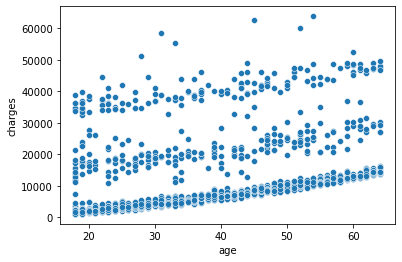

In [55]:
ax = sns.scatterplot(x='age', y='charges', data=insurance_df)

In [56]:
scipy.stats.pearsonr(insurance_df['age'], insurance_df['charges'])

(0.2990081933306476, 4.8866933317203816e-29)

In [57]:
# calculate correlation coefficients across all numerical variables in panda's dataframe
corr = insurance_df.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


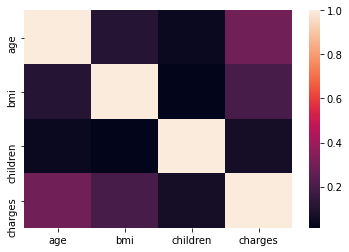

In [58]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# 5. Linear regression

### Simple linear regression

Using insurance data, check if age affects total charges and write formula to predict total charges base on age.

In [59]:
X = insurance_df['age']
# X = insurance_df['age'].values
y = insurance_df['charges']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
model.summary()

C:\Users\nuran\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Fri, 09 Jul 2021   Prob (F-statistic):           4.89e-29
Time:                        18:56:18   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the summary above, we can write a regression equation:
    
$charges = 3165.89 + 257.72*age + error$

Means, every one year increase in age will increase total charge by 257.72

### Multiple linear regression

In [61]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [62]:
reg_dummy   = pd.get_dummies(insurance_df[['region']], drop_first=True)
sex_dummy   = pd.get_dummies(insurance_df[['sex']], drop_first=True)
smoke_dummy = pd.get_dummies(insurance_df[['smoker']], drop_first=True)

In [63]:
Xs = pd.concat([insurance_df[['bmi', 'children']], reg_dummy, sex_dummy, smoke_dummy], axis=1)
y = insurance_df['charges']
Xs = sm.add_constant(Xs) 

model = sm.OLS(y, Xs).fit()
model.summary()

C:\Users\nuran\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     374.8
Date:                Fri, 09 Jul 2021   Prob (F-statistic):          2.97e-309
Time:                        19:02:02   Log-Likelihood:                -13749.
No. Observations:                1338   AIC:                         2.751e+04
Df Residuals:                    1330   BIC:                         2.756e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -3952.9723   1064.068     -3.715      0.000   -6040.407   -1865.538
bmi                411.2700     32.998     12.464      0.000     346.537     476.003
children           597.4632    159.956      3.735      0.000     283.669     911.257
region_northwest  -392.3686    553.299     -0.709      0.478   -1477.802     693.065
region_southeast -1410.2693    555.743     -2.538      0.011   -2500.498    -320.040
region_southwest -1031.8915    555.215     -1.859      0.063   -2121.083      57.300
sex_male          -310.8509    386.671     -0.804      0.422   -1069.403     447.701
smoker_yes        2.366e+04    479.863     49.303      0.000    2.27e+04    2.46e+04
==============================================================================
Omnibus:                      162.572   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.818
Skew:                           0.833   Prob(JB):                     6.28e-57
Kurtosis:                       4.366   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Assumptions for linear regression:  
- **Linearity**: The relationship between X and the mean of Y is linear.
- **Homoscedasticity**: The variance of residual is the same for any value of X.
- **Independence**: Observations are independent of each other.
- **Normality**: For any fixed value of X, Y is normally distributed.

Interpreting coeficient for dummy variables:  
- region_northwest = -392.3686 : total charge for northwest region is 392.37 lower than northest (reference)
- sex_male = -310.8509 : total charge for males is 310.85 lower than females (reference)
- smoker_yes = 2.366e+04 : total charge for smokers is 23,660 higher than non-smokers

---
Prepared for TelkomAthon Batch 2 Telkom Indonesia (Stream Data Science)  
Data source: Insurance data is taken from [kaggle](https://www.kaggle.com/mirichoi0218/insurance/)